### Import necessary libraries

In [149]:
# Import necessary libraries

import numpy as np# Library for numerical operations
import pandas as pd# Library for data manipulation and analysis
import nltk# Natural Language Toolkit for text processing
import random# Library for generating random numbers
import os# Operating system module
from textblob import TextBlob


In [150]:
# Read and Peak at Data
e_data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [151]:
# Assuming 'e_data' is a variable containing some data (e.g., a NumPy array or pandas DataFrame)
# The '.shape' attribute returns the dimensions (rows, columns) of the data
# This code will print the shape of the 'e_data' variable
print(e_data.shape)

(23486, 11)


In [152]:
# Assuming 'e_data' is a variable containing some data (e.g., a pandas DataFrame)
# The '.head()' function returns the first few rows of the data (by default, the first 5 rows)
# This code will display the first 5 rows of the 'e_data' variable
e_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [153]:
# Assuming 'e_data' is a variable containing some data (e.g., a pandas DataFrame)
# The '.info()' function provides a concise summary of the data, including the data types and non-null values for each column
# This code will display information about the 'e_data' variable, such as column names, data types, and non-null counts
e_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [157]:
e_data.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [104]:
# Assuming 'e_data' is a variable containing some data (e.g., a pandas DataFrame)
# The '.dtypes' attribute returns the data types of each column in the DataFrame
# This code will display the data types of the columns in the 'e_data' variable

column_data_types = e_data.dtypes
# 'column_data_types' now contains a pandas Series with column names as index and their respective data types as values

# You can access the data type of a specific column using its name like this:
# age_data_type = column_data_types['age']

# It's useful to check the data types to understand how the data is stored and to handle any potential type-related issues
column_data_types

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [105]:
# The '.isnull()' function checks each element of the DataFrame for missing/null values
# It returns a DataFrame of the same shape as 'e_data' where each element is True if it's null, False otherwise

# The '.sum()' function is then applied to the result of 'e_data.isnull()' to calculate the count of null values in each column
# This code will display the number of null values for each column in the 'e_data' variable

null_counts_per_column = e_data.isnull().sum()
# 'null_counts_per_column' now contains a pandas Series with column names as index and the respective count of null values as values
null_counts_per_column

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [106]:
# The following line drops the first column of 'e_data' inplace (permanently) along the columns (axis=1).
# The 'e_data.columns[0]' extracts the label (name) of the first column to be dropped.
e_data.drop(e_data.columns[0], inplace=True, axis=1)
# Now, the DataFrame 'e_data' is modified and no longer contains the first column.

# After dropping the first column, we can check for null values in each column using the '.isnull()' function, 
# and then calculate the count of null values in each column using the '.sum()' function.
# This code will display the number of null values for each column in the modified 'e_data' DataFrame.

null_counts_per_column = e_data.isnull().sum()
# 'null_counts_per_column' now contains a pandas Series with column names as index and the respective count of null values as values.
null_counts_per_column

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [107]:
# Delete missing observations for following variables
for x in ["Title", "Division Name", "Department Name", "Class Name", "Review Text"]:
    e_data = e_data[e_data[x].notnull()]  # Filtering the dataframe to include only rows where the specified columns are not null

# Iterate over the list of column names ["Division Name", "Department Name", "Class Name", "Review Text"]
# For each column name, filter the dataframe (df) to include only rows where the column is not null

In [108]:
e_data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [109]:
e_data.shape

(19662, 10)

In [110]:
e_data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [111]:
e_data.sample(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
6744,1111,27,Floral and feminine,This dress is a great dress for spring and sum...,5,1,4,General,Dresses,Dresses
14604,1081,39,I knew i would love it,I saw this in the store and wanted to try it o...,5,1,20,General,Dresses,Dresses
4851,829,60,Thumbs up for the downhill skier blouse,I had my eye on the skier blouse for awhile be...,5,1,0,General Petite,Tops,Blouses


In [112]:
duplicates = e_data.duplicated()
print(duplicates)

2        False
3        False
4        False
5        False
6        False
         ...  
23481    False
23482    False
23483    False
23484    False
23485    False
Length: 19662, dtype: bool


In [113]:
data_no_duplicates = e_data.drop_duplicates()
print(data_no_duplicates)

       Clothing ID  Age                                              Title  \
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
5             1080   49                            Not for the very petite   
6              858   39                               Cagrcoal shimmer fun   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Ratin

In [114]:
# The '.describe()' function provides a statistical summary of the data in 'e_data', including measures like mean, standard deviation, etc.
# The '.T' attribute transposes the result, flipping rows and columns for easier readability.

# This line drops the 'count' row from the transposed result, as it only contains the count of non-null values for each column,
# which is not relevant for the statistics calculation.

# The resulting DataFrame will display summary statistics like mean, min, max, and quartiles for each column in 'e_data'.

summary_statistics = e_data.describe().T.drop('count', axis=1)
# 'summary_statistics' now contains the transposed summary statistics DataFrame, excluding the 'count' row.

# You can access the summary statistics for a specific column using its name like this:
# mean_age = summary_statistics.loc['age', 'mean']

# The 'describe()' function is helpful for getting an initial overview of the data's distribution and central tendencies.
# Dropping the 'count' row makes the output more concise and informative for analysis and reporting.
summary_statistics]

,mean,std,min,25%,50%,75%,max
Clothing ID,921.297274,200.227528,1.0,861.0,936.0,1078.0,1205.0
Age,43.260808,12.258122,18.0,34.0,41.0,52.0,99.0
Rating,4.183145,1.112224,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818177,0.385708,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.652477,5.834285,0.0,0.0,1.0,3.0,122.0


In [115]:
e_data['Clothing ID'].unique()

array([1077, 1049,  847, ...,  721,  262,  522])

In [116]:
e_data['Clothing ID'].value_counts()

1078    871
862     658
1094    651
1081    487
829     452
       ... 
201       1
1200      1
525       1
1127      1
522       1
Name: Clothing ID, Length: 1095, dtype: int64

In [117]:
# The following code calculates the popularity of each product in the 'e_data' DataFrame based on the number of ratings.

# Group the 'e_data' DataFrame by 'Clothing ID' and count the number of occurrences of each 'Clothing ID'.
popular_products = pd.DataFrame(e_data.groupby('Clothing ID')['Rating'].count())

# 'popular_products' DataFrame now contains two columns: 'Clothing ID' (index) and 'Rating' (count of ratings for each product).

# Sort the 'popular_products' DataFrame in descending order based on the 'Rating' column to find the most popular products.
most_popular = popular_products.sort_values('Rating', ascending=False)

# 'most_popular' DataFrame now contains the products sorted by popularity, with the most popular products at the top.

# Display the top 10 most popular products by using the '.head(10)' function.
top_10_popular_products = most_popular.head(10)

# 'top_10_popular_products' now contains the top 10 most popular products and their respective rating counts.

# You can access the 'Clothing ID' and 'Rating' columns like this:
# top_10_popular_products['Clothing ID'] or top_10_popular_products['Rating']
top_10_popular_products

,Rating
Clothing ID,
1078,871
862,658
1094,651
1081,487
829,452
872,450
1110,419
868,370
895,336


<AxesSubplot:xlabel='Clothing ID'>

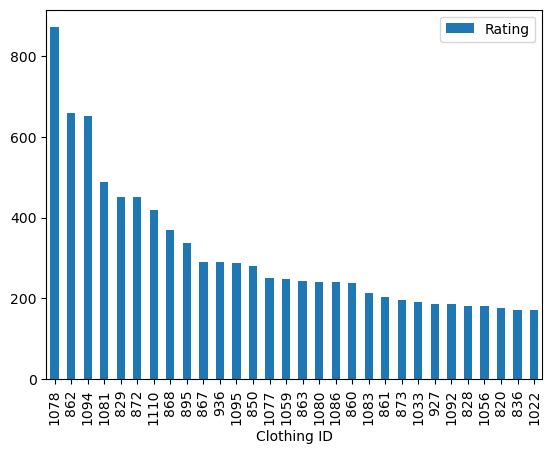

In [160]:
most_popular.head(30).plot(kind = "bar")

In [161]:
least_popular = popular_products.sort_values('Rating', ascending=True)

<AxesSubplot:xlabel='Clothing ID'>

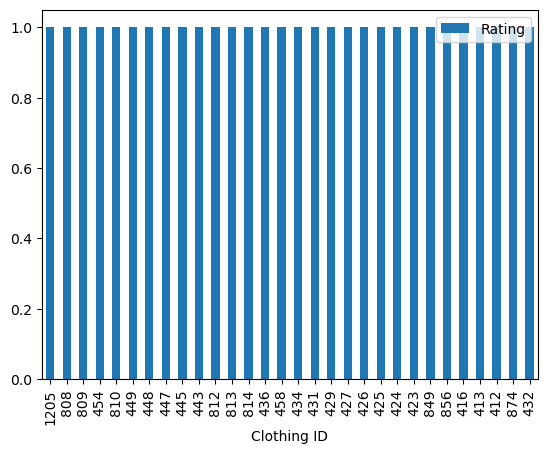

In [164]:
least_popular.head(30).plot(kind = "bar")

In [119]:
e_data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [120]:
e_data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [122]:
# Assuming 'e_data' is a DataFrame containing the 'Review Text' column

# Step 1: Define a function to calculate polarity and subjectivity
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    return pd.Series([polarity, subjectivity])

In [123]:
# Step 2: Apply the sentiment function to the 'Review Text' column
e_data[['Polarity', 'Subjectivity']] = e_data['Review Text'].apply(get_sentiment)

In [124]:
# Step 3: Print the DataFrame with polarity and subjectivity columns
print(e_data[['Review Text', 'Polarity', 'Subjectivity']])

                                             Review Text  Polarity  \
2      I had such high hopes for this dress and reall...  0.073675   
3      I love, love, love this jumpsuit. it's fun, fl...  0.550000   
4      This shirt is very flattering to all due to th...  0.512891   
5      I love tracy reese dresses, but this one is no...  0.178750   
6      I aded this in my basket at hte last mintue to...  0.133750   
...                                                  ...       ...   
23481  I was very happy to snag this dress at such a ...  0.552667   
23482  It reminds me of maternity clothes. soft, stre...  0.091667   
23483  This fit well, but the top was very see throug...  0.414286   
23484  I bought this dress for a wedding i have this ...  0.322222   
23485  This dress in a lovely platinum is feminine an...  0.413889   

       Subjectivity  
2          0.356294  
3          0.625000  
4          0.568750  
5          0.533125  
6          0.607778  
...             ...  
23481

In [125]:
e_data.head()


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Subjectivity
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.178750,0.533125
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.133750,0.607778


In [130]:
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [133]:
e_data['Sentiment Label'] = e_data['Polarity'].apply(get_sentiment_label)

In [135]:
sentiment_counts = e_data['Sentiment Label'].value_counts()
print(sentiment_counts)

Positive    18443
Negative     1141
Neutral        78
Name: Sentiment Label, dtype: int64


In [136]:
e_data['Sentiment Label'] = e_data['Subjectivity'].apply(get_sentiment_label)

In [137]:
sentiment_counts = e_data['Sentiment Label'].value_counts()
print(sentiment_counts)

Positive    19623
Neutral        39
Name: Sentiment Label, dtype: int64


In [138]:
# Assuming 'e_data' is the DataFrame containing the cleaned data

# Replace 'file_path' with the desired path where you want to save the new CSV file.
# If you want to save it in the same directory as the notebook, you can use 'cleaned_data.csv'.
file_path = 'cleaned_data.csv'

# Save the cleaned data to a new CSV file
e_data.to_csv(file_path, index=False)

In [139]:
sp_data = pd.read_csv("cleaned_data.csv")

In [140]:
sp_data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Subjectivity,Sentiment Label
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,Positive
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,Positive
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,Positive
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.178750,0.533125,Positive
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.133750,0.607778,Positive


In [129]:
sp_data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Polarity                   0
Subjectivity               0
dtype: int64

In [158]:
sp_data.nunique()

Clothing ID                 1095
Age                           77
Title                      13983
Review Text                19656
Rating                         5
Recommended IND                2
Positive Feedback Count       79
Division Name                  3
Department Name                6
Class Name                    20
Polarity                   11725
Subjectivity               10567
Sentiment Label                2
dtype: int64